In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Code from Scratch

In [102]:
# returning hx for each sample hence, a numpy array of size (m X 1)
def hypothesis(X,theta):
    return np.sum(X*theta[1:], axis=1).reshape((-1,1)) + theta[0] # using numpy broadcasting

In [103]:
# retuning sigmoid for each sample hence, a numpy array of size (m X 1)
def sigmoid(X,theta):
    hx = hypothesis(X,theta)
    return 1.0 / (1.0 + np.exp(-1*hx))

In [104]:
# returning scalar value as error
def negative_log_likelihood(X,Y,theta):
    g_h_x = sigmoid(X,theta)    
    log_liklihood = np.sum(Y * np.log2(g_h_x) +  (1-Y) * np.log2(1 - g_h_x) )
    return  -1 * log_liklihood

In [105]:
# return gradients w.r.t theta ,size = (n+1,)
def gradient(X,Y,theta):
    grad = np.zeros(X.shape[1] + 1)
    hx = sigmoid(X,theta)
    grad[0] = np.sum(hx - Y)
    for i in range(1, X.shape[1] + 1):
        mul = X[:,i-1].reshape((-1,1))
        grad[i] = np.sum((hx - Y)*mul)
    
    return grad

In [106]:
# goal of this function is to minimize the ``Negative of log of likelihood`` using graident descent
# code is similar to Linear Regression but hypothesis function is different

def LogisticRegression(X,Y,learning_rate=0.001):
    # Y should have a shape with atleast two axis, otherwise use reshape((-1,1))
    theta = np.zeros(X.shape[1] + 1)
    error = []
    err = negative_log_likelihood(X,Y,theta)
    error.append(err)
    while True:        
#         print(error[-1])
        grad = gradient(X,Y,theta)
        theta = theta - learning_rate * grad
        err = negative_log_likelihood(X,Y,theta)
        if abs(err - error[-1]) < 0.0001:
            break
        error.append(err)
        
    return theta,error

In [107]:
def predict(X_test, theta):
    import numpy as np
    g_h_x = sigmoid(X_test,theta)
    Y_pred = []
    for i in range(X_test.shape[0]):
        if g_h_x[i] >= 0.5:
            Y_pred.append(1)
        else:            
            Y_pred.append(0)
    return np.array(Y_pred)

    
def accuracy(Y_actual, Y_predict):
    total = Y_actual.shape[0]
    
    diff = np.sum(Y_actual == Y_predict)
    return diff / total

# Example 1

#####  Data Preparation for Logistic Regression

In [108]:
from sklearn.datasets import make_classification,make_blobs

In [109]:
X,Y = make_blobs(n_samples=500, n_features=2, shuffle=True, random_state=101,centers=2)

In [110]:
X.shape

(500, 2)

In [111]:
Y.shape

(500,)

In [112]:
# splitting into test and training data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=50)

In [113]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(400, 2)
(100, 2)
(400,)
(100,)


##### Running code 

In [114]:
theta,error = LogisticRegression(X_train,Y_train.reshape((-1,1))) # calling function we made earlier

In [115]:
theta 

array([-5.62650318, -0.64125776, -1.60465126])

In [116]:
error[0] ,error[1]

(400.0, 91.39419440035539)

#####  Plotting

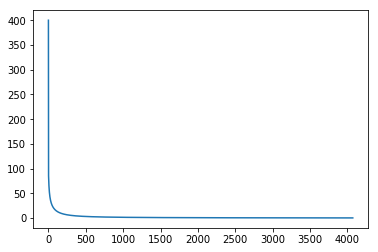

In [117]:
plt.plot(error)

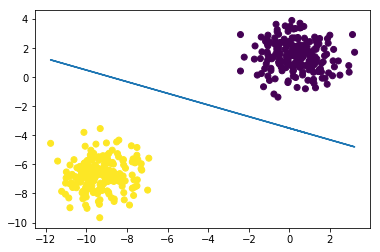

In [118]:
plt.scatter(X_train[:,0], X_train[:,1],c=Y_train)
X1 = X_train[:,0]
X2 = -1 * ((theta[0] + theta[1]*X1) / theta[2])
plt.plot(X1,X2)

#####  Prediction And Accuracy

In [119]:
Y_pred = predict(X_test,theta)

In [120]:
accuracy(Y_test, Y_pred)

1.0

# Example 2

#####  Data Prep.

In [121]:
X,Y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, random_state=50,shuffle=True)


In [122]:
# splitting into test and training data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=50)

#####  Running code

In [123]:
theta,error = LogisticRegression(X_train,Y_train.reshape((-1,1)))

In [124]:
theta

array([ 0.00989401,  1.87037757, -1.00896381])

#####  Plotting

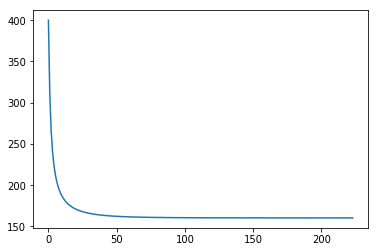

In [125]:
plt.plot(error)

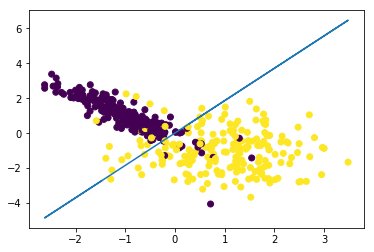

In [126]:
plt.scatter(X_train[:,0], X_train[:,1],c=Y_train)
X1 = X_train[:,0]
X2 = -1 * ((theta[0] + theta[1]*X1) / theta[2])
plt.plot(X1,X2)

#####  Prediction And Accuracy

In [127]:
Y_pred = predict(X_test,theta)

In [128]:
accuracy(Y_test, Y_pred)

0.91

# Using Sklearn to do it(`from sklearn.linear_model import LogisticRegression`)

#####  Model

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
X,Y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, random_state=50,shuffle=True)
# X,Y = make_blobs(n_samples=500, n_features=2, shuffle=True, random_state=101,centers=2)

In [131]:
# splitting into test and training data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=50)

#####  Running code

In [132]:
model = LogisticRegression(random_state=101, solver = 'lbfgs')

In [133]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=101, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [134]:
coef = model.coef_.flatten()
coef

array([ 1.79262942, -0.98106302])

In [135]:
bias = model.intercept_.flatten()
bias

array([0.00652824])

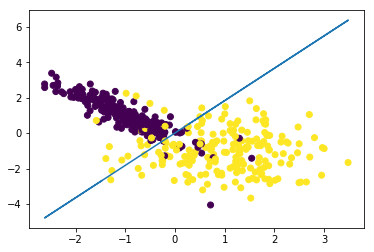

In [136]:
plt.scatter(X_train[:,0], X_train[:,1],c=Y_train)
X1 = X_train[:,0]
X2 = -1 * ((bias + coef[0]*X1) / coef[1])
plt.plot(X1,X2)

#####  Prediction And Accuracy

In [137]:
Y_pred = model.predict(X_test)

In [138]:
model.score(X_test,Y_pred)

1.0